In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Jeu de données/customer-segmentation-dataset/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# list of numeric variable
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

print('Number of variable numeric: ', len(num_vars))

# show
df[num_vars].head()

Number of variable numeric:  4


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [10]:
# list of categorical variable
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']

print('Number of variable categoric: ', len(cat_vars))

# show
df[cat_vars].head()

Number of variable categoric:  1


,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


Text(0.5,1,'% Statistique')

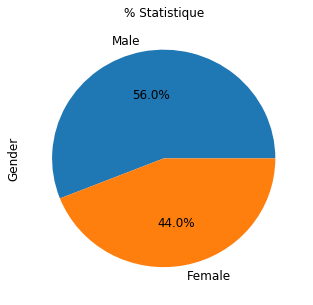

In [15]:
#Viz

import matplotlib.ticker as mtick
ax = (df['Gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% Statistique', fontsize = 12)

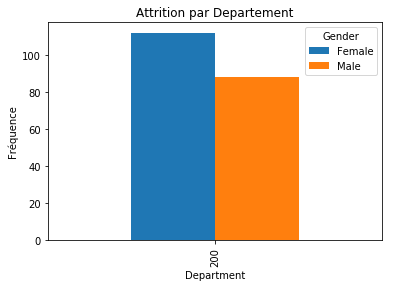

In [20]:
pd.crosstab(len(df),df["Gender"]).plot(kind='bar')
plt.title('Attrition par Departement')
plt.xlabel('Gender')
plt.ylabel('Fréquence')
plt.show()